In [1]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos de entrenamiento y prueba
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [12]:
# Crear la característica de intensidad de píxeles mediante la suma de intensidades para cada imagen
train_data['pixel_sum'] = train_data.drop(columns=['label']).sum(axis=1)
test_data['pixel_sum'] = test_data.drop(columns=['label']).sum(axis=1)

In [13]:
# Separar las etiquetas y los píxeles en los conjuntos de entrenamiento y prueba
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_test = test_data.drop(columns=['label'])
y_test = test_data['label']

In [14]:
# Inicializar y entrenar el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

In [16]:
# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


In [17]:
# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[ 921    0   10    4    4   11    9    3    8   10]
 [   1 1093    7   11    2    7    3    5    4    2]
 [  13   13  875   34   15   13    8   30   24    7]
 [   9    3   33  853    5   49    4   12   17   25]
 [   7    2    9    2  864   11   23    5   19   40]
 [  17    7    5   35    6  746   25    9   22   20]
 [  15    2   14    4   21   25  848    2   23    4]
 [   2   21   25   14   10    6    2  914   11   23]
 [  12    7   20   31   28   30    9    8  799   30]
 [  11    5    7   19   39   12    6   23   18  869]]


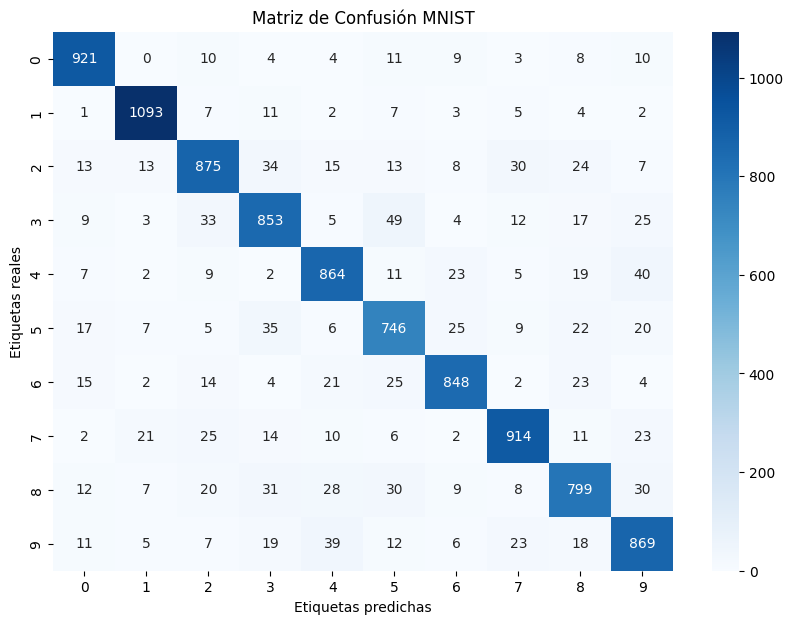

In [18]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión MNIST')
plt.show()